In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
pd.set_option('display.max_columns', None)

In [216]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [217]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp pedestal,sector 70a,1.60,10158.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3,3,3,2.0,North-East,New Property,NaN,NaN,1575.0,0,1,0,0,1,2,77
1,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3,3,3+,2.0,North-East,Relatively New,NaN,NaN,1450.0,0,0,0,0,1,1,145
2,flat,dlf the primus,sector 82a,1.59,10338.0,1538.0,Super Built up area 1799(167.13 sq.m.)Carpet a...,3,3,3+,5.0,North-East,Relatively New,1799.0,NaN,1538.0,0,0,0,0,1,0,167
3,flat,signature global city,sector 37d,0.80,8421.0,950.0,Super Built up area 950(88.26 sq.m.),2,2,2,2.0,NaN,Undefined,950.0,NaN,NaN,0,0,0,0,0,2,42
4,flat,dlf the ultima,sector 81,2.25,10699.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3,3,3+,11.0,North-East,Relatively New,2103.0,1600.0,1257.0,1,1,0,1,1,0,49


In [218]:
df.shape

(3677, 23)

In [219]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

<Axes: xlabel='price', ylabel='Count'>

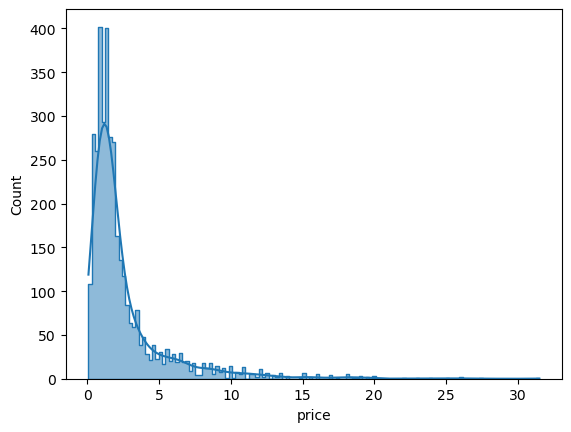

In [220]:
# outliers on the basis of price column
sns.histplot(x=df['price'], kde=True, element='step' )

<Axes: xlabel='price'>

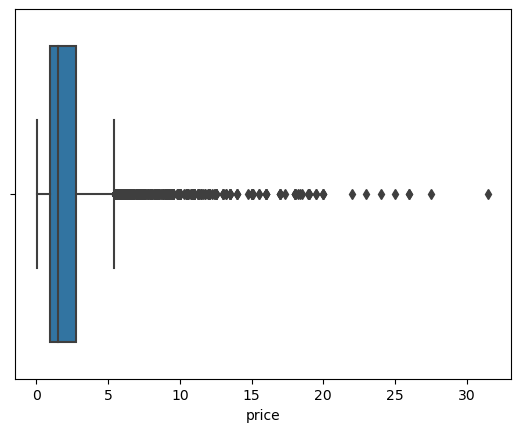

In [221]:
sns.boxplot(x=df['price'])

In [222]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [223]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3151,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,0,74
22,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
958,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
1990,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
1244,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,2,0
3368,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
1102,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
3115,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,2,54
1210,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31
1854,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,0,97


In [224]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

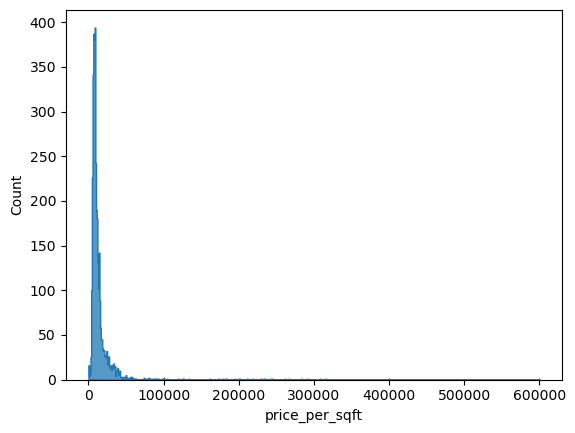

In [225]:
sns.histplot(x=df['price_per_sqft'], element='step')

<Axes: xlabel='price_per_sqft'>

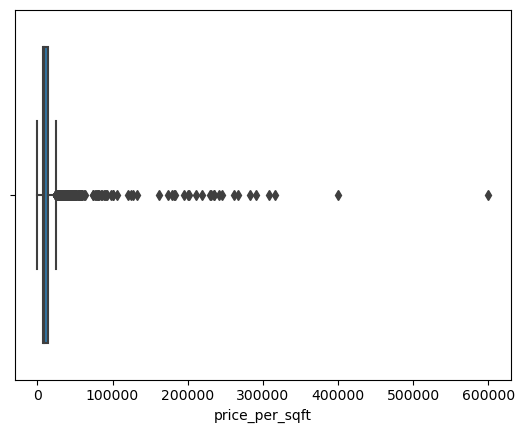

In [226]:
sns.boxplot(x=df['price_per_sqft'])

In [227]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [228]:
# outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x) # this giving some warning


# Create a boolean mask for the condition
mask = outliers_sqft['area'] < 1000

# Use .loc[] to set values in the original DataFrame
outliers_sqft.loc[mask, 'area'] *= 9


In [229]:
# outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area']) # this giving some warning


# Use .loc[] to set values in the original DataFrame
outliers_sqft.loc[mask, 'price_per_sqft'] = round((outliers_sqft.loc[mask, 'price'] * 10000000) / outliers_sqft.loc[mask, 'area'])


In [230]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.827684
std      12403.087261
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [231]:
df.update(outliers_sqft)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

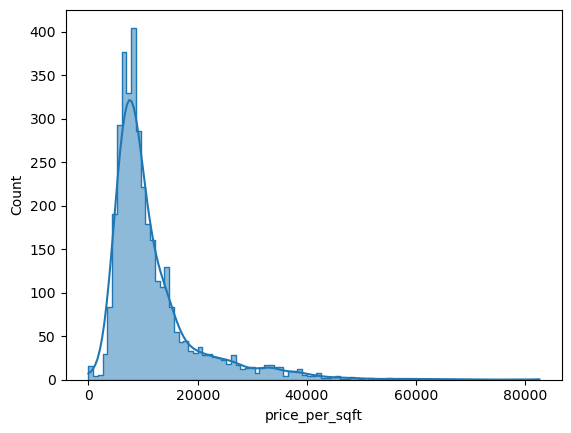

In [232]:
sns.histplot(x=df['price_per_sqft'], element='step', kde=True)

<Axes: xlabel='price_per_sqft'>

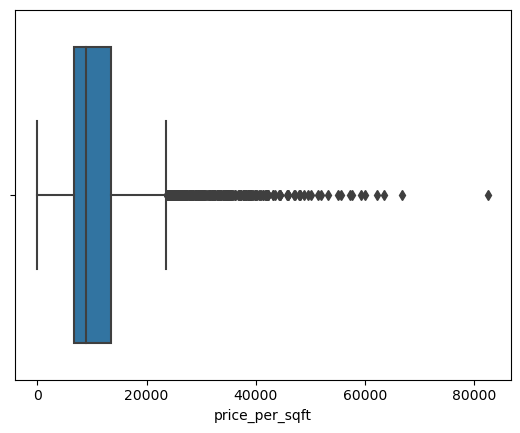

In [233]:
sns.boxplot(x=df['price_per_sqft'])

In [234]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
610,flat,unitech vistas,sector 70,9.00,57507.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0
630,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0
889,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,153.0
958,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,138.0
1157,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,99.0
1324,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,75.0
1640,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,0.0,72.0
1990,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,0.0,72.0
2903,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,1.0,103.0
2937,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,137.0


In [235]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

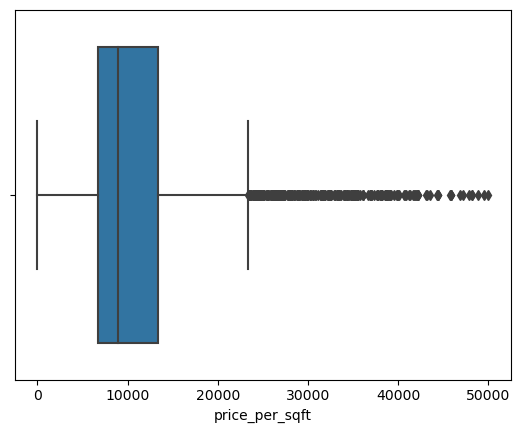

In [236]:
sns.boxplot(x=df['price_per_sqft'])

### Area

<Axes: xlabel='area', ylabel='Count'>

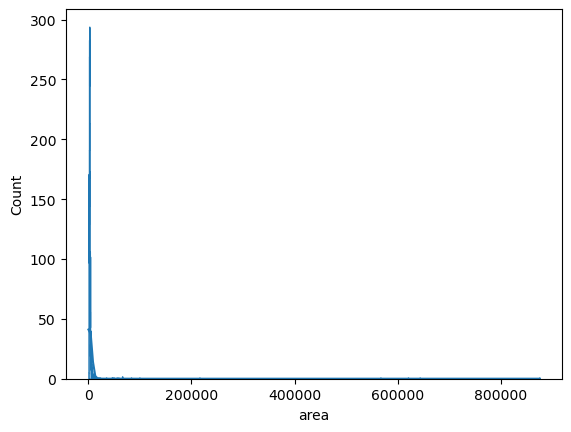

In [237]:
sns.histplot(x=df['area'], kde=True, element='step')

<Axes: xlabel='area'>

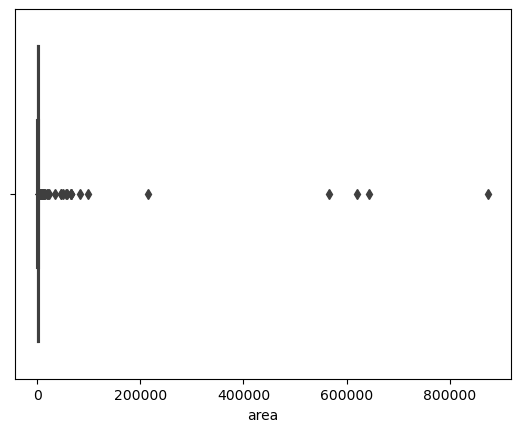

In [238]:
sns.boxplot(x=df['area'])

In [239]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [240]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
342,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,2.0,44.0
592,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,2.0,76.0
931,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,2.0,65.0
1304,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,44.0
2384,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [241]:
df = df[df['area'] < 100000]

<Axes: xlabel='area', ylabel='Count'>

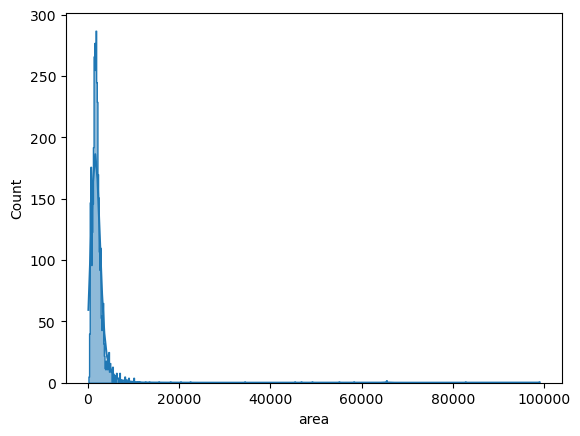

In [242]:
sns.histplot(x=df['area'], kde=True, element='step')

<Axes: xlabel='area'>

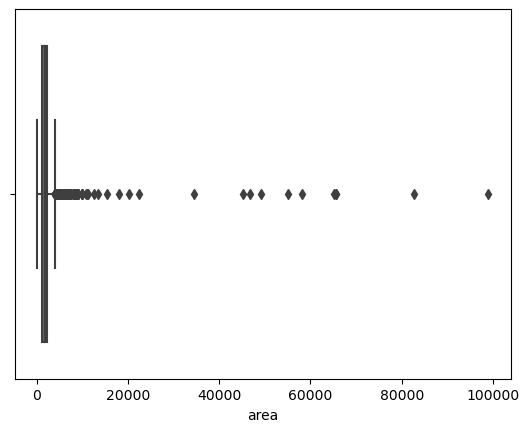

In [243]:
sns.boxplot(x=df['area'])

In [244]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1027,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,1.0,60.0
3674,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,7.0
1093,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,2.0,51.0
1590,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,2.0,15.0
3370,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3399,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,2.0,15.0
1602,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,2.0,37.0
127,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,2.0,37.0
657,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,1.0,109.0
1310,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,2.0,33.0


In [245]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [246]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1027,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,1.0,60.0
3674,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,7.0
1093,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,2.0,51.0
1590,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,2.0,15.0
3370,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3399,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,2.0,15.0
1602,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,2.0,37.0
127,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,2.0,37.0
657,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,1.0,109.0
1310,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,2.0,33.0


In [247]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

<Axes: xlabel='area', ylabel='Count'>

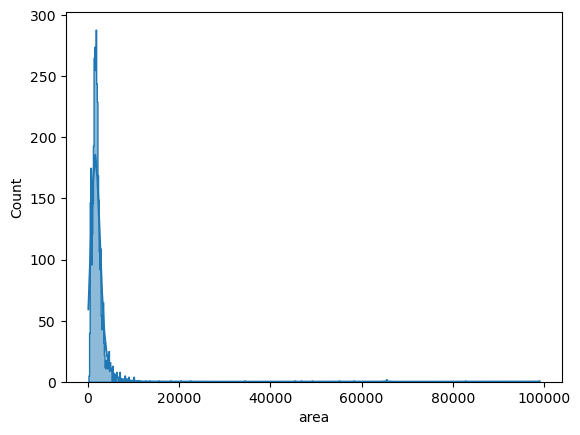

In [248]:
sns.histplot(x=df['area'], kde=True, element='step')

<Axes: xlabel='area'>

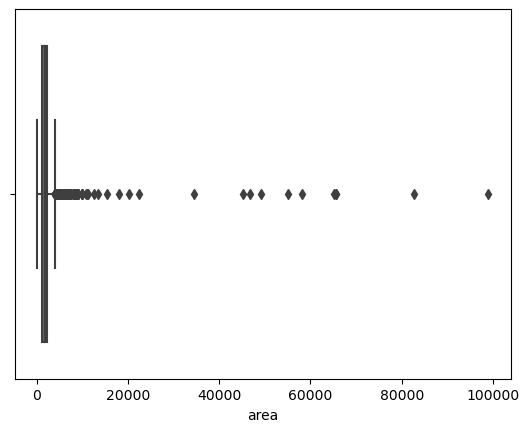

In [249]:
sns.boxplot(x=df['area'])

In [250]:
df['area'].describe()

count     3633.000000
mean      2152.299752
std       3628.921657
min        145.000000
25%       1261.000000
50%       1750.000000
75%       2343.000000
max      98978.000000
Name: area, dtype: float64

### Bedroom

<Axes: xlabel='bedRoom', ylabel='Count'>

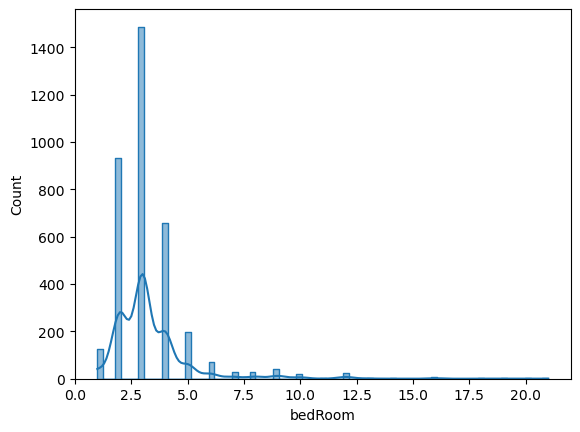

In [251]:
sns.histplot(x=df['bedRoom'], kde=True, element='step')

<Axes: xlabel='bedRoom'>

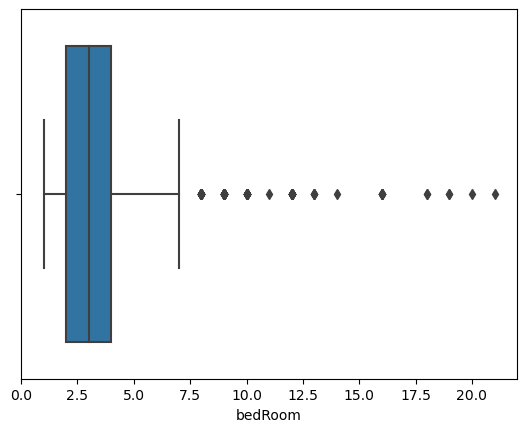

In [252]:
sns.boxplot(x=df['bedRoom'])

In [253]:
df['bedRoom'].describe()

count    3633.000000
mean        3.332783
std         1.831614
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [254]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3431,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,49.0
1722,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,22.0
88,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,74.0
1686,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,2.0,68.0
2684,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,70.0
1292,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,57.0
1210,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,31.0
2177,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,41.0
2717,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2743,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,153.0


In [255]:
df = df[df['bedRoom'] <= 10]

In [256]:
df.shape

(3588, 23)

<Axes: xlabel='bedRoom', ylabel='Count'>

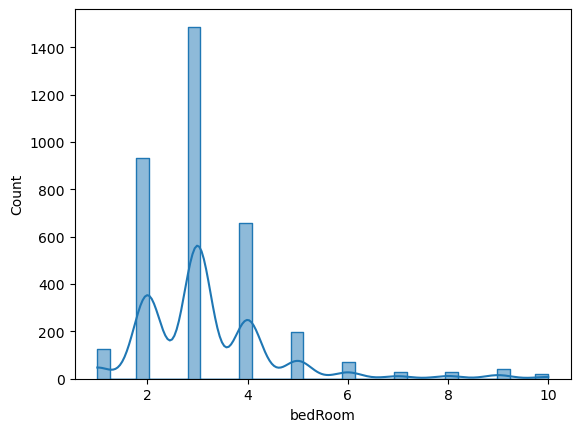

In [257]:
sns.histplot(df['bedRoom'], kde=True, element='step')

<Axes: xlabel='bedRoom'>

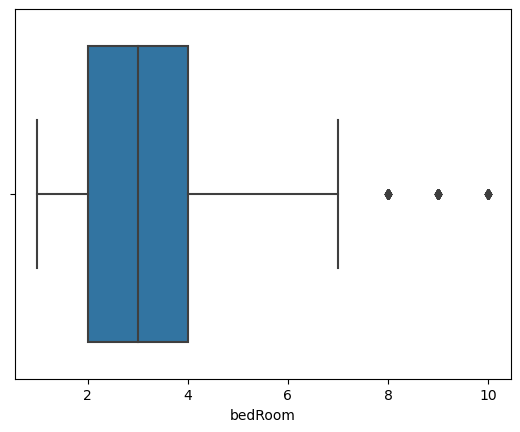

In [258]:
sns.boxplot(x=df['bedRoom'])

In [259]:
df['bedRoom'].describe()

count    3588.000000
mean        3.202899
std         1.395989
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

<Axes: xlabel='bathroom', ylabel='Count'>

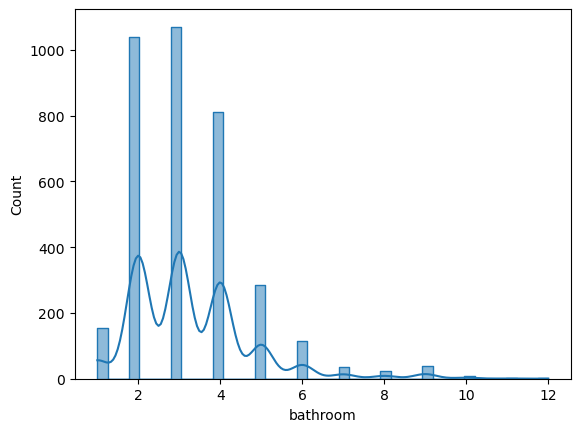

In [260]:
sns.histplot(df['bathroom'], kde=True, element='step')

<Axes: xlabel='bathroom'>

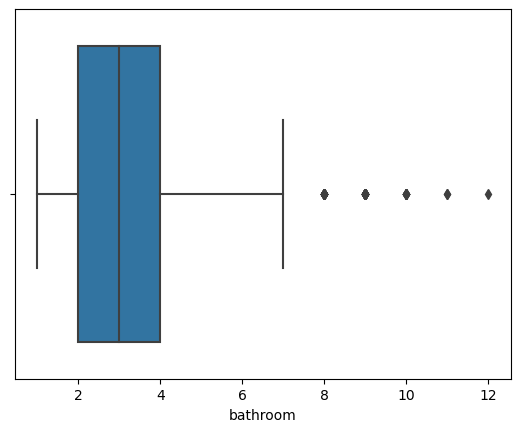

In [261]:
sns.boxplot(x=df['bathroom'])

In [262]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1489,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,146.0
485,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,38.0
1763,house,independent,sector 24,11.00,28898.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,39.0


In [263]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp pedestal,sector 70a,1.60,10158.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3.0,3.0,3,2.0,North-East,New Property,NaN,NaN,1575.0,0.0,1.0,0.0,0.0,1.0,2.0,77.0
1,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3.0,3.0,3+,2.0,North-East,Relatively New,NaN,NaN,1450.0,0.0,0.0,0.0,0.0,1.0,1.0,145.0
3,flat,signature global city,sector 37d,0.80,8421.0,950.0,Super Built up area 950(88.26 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,950.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,42.0
4,flat,dlf the ultima,sector 81,2.25,10699.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3.0,3.0,3+,11.0,North-East,Relatively New,2103.0,1600.0,1257.0,1.0,1.0,0.0,1.0,1.0,0.0,49.0
5,flat,dlf the ultima,sector 81,2.35,11174.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3.0,3.0,3+,14.0,South,Relatively New,2103.0,1550.0,1257.0,1.0,1.0,0.0,1.0,1.0,0.0,49.0


### super built up area

<Axes: xlabel='super_built_up_area', ylabel='Count'>

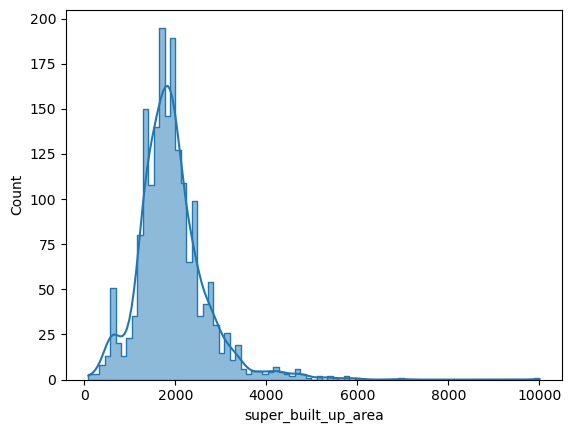

In [264]:
sns.histplot(df['super_built_up_area'], kde=True, element='step')

<Axes: xlabel='super_built_up_area'>

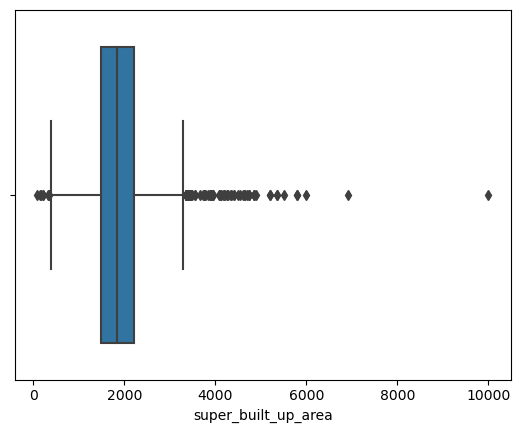

In [265]:
sns.boxplot(x=df['super_built_up_area'])

In [266]:
df['super_built_up_area'].describe()

count     1871.000000
mean      1925.034500
std        764.915546
min         89.000000
25%       1478.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [267]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2868,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,140.0
3257,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,2.0,49.0


### built up area

<Axes: xlabel='built_up_area', ylabel='Count'>

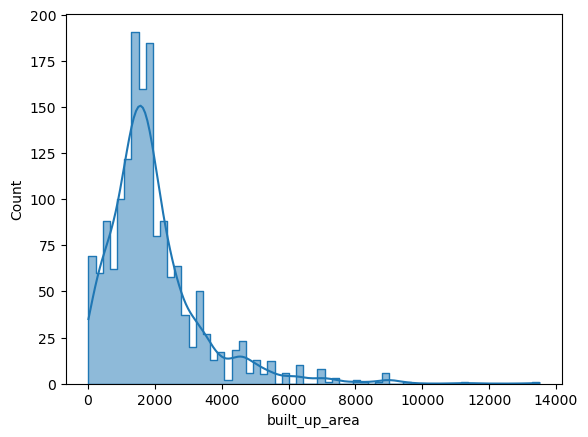

In [268]:
sns.histplot(df['built_up_area'], kde=True, element='step')

<Axes: xlabel='built_up_area'>

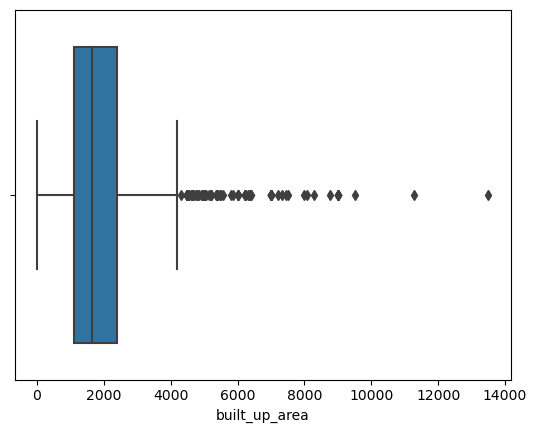

In [269]:
sns.boxplot(x=df['built_up_area'])

In [270]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
22,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,42.0
2190,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,0.0


### carpet area

<Axes: xlabel='carpet_area', ylabel='Count'>

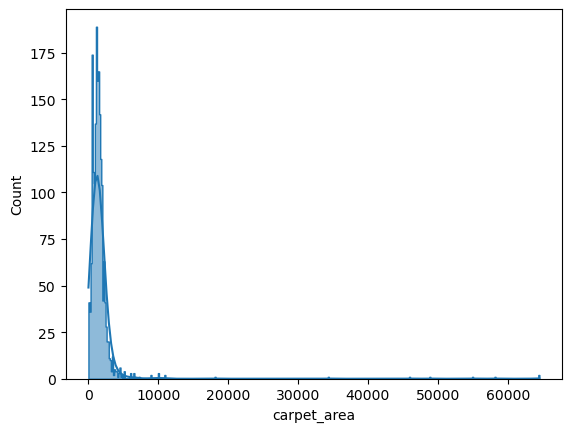

In [271]:
sns.histplot(df['carpet_area'], kde=True, element='step')

<Axes: xlabel='carpet_area'>

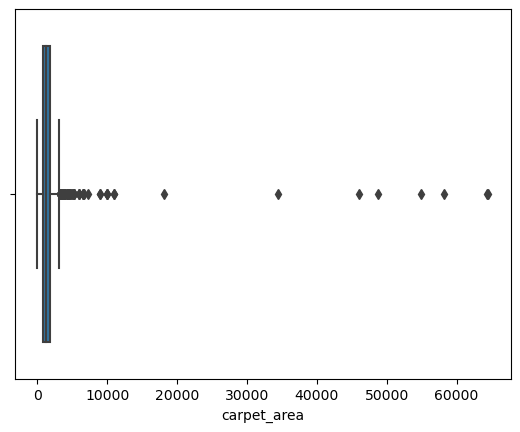

In [272]:
sns.boxplot(x=df['carpet_area'])

In [273]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
127,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,2.0,37.0
1027,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,1.0,60.0
1093,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,2.0,51.0
1188,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,2.0,60.0
1310,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,2.0,33.0
1590,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,2.0,15.0
1602,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,2.0,37.0
2583,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,1.0,44.0
3399,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0
3589,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0


In [274]:
df.loc[2131,'carpet_area'] = 1812

In [275]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
127,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,2.0,37.0
1027,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,1.0,60.0
1093,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,2.0,51.0
1188,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,2.0,60.0
1310,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,2.0,33.0
1590,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,2.0,15.0
1602,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,2.0,37.0
2583,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,1.0,44.0
3399,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0
3589,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0


In [276]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp pedestal,sector 70a,1.60,10158.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3.0,3.0,3,2.0,North-East,New Property,NaN,NaN,1575.0,0.0,1.0,0.0,0.0,1.0,2.0,77.0
1,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3.0,3.0,3+,2.0,North-East,Relatively New,NaN,NaN,1450.0,0.0,0.0,0.0,0.0,1.0,1.0,145.0
3,flat,signature global city,sector 37d,0.80,8421.0,950.0,Super Built up area 950(88.26 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,950.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,42.0
4,flat,dlf the ultima,sector 81,2.25,10699.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3.0,3.0,3+,11.0,North-East,Relatively New,2103.0,1600.0,1257.0,1.0,1.0,0.0,1.0,1.0,0.0,49.0
5,flat,dlf the ultima,sector 81,2.35,11174.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3.0,3.0,3+,14.0,South,Relatively New,2103.0,1550.0,1257.0,1.0,1.0,0.0,1.0,1.0,0.0,49.0


<Axes: xlabel='luxury_score', ylabel='Count'>

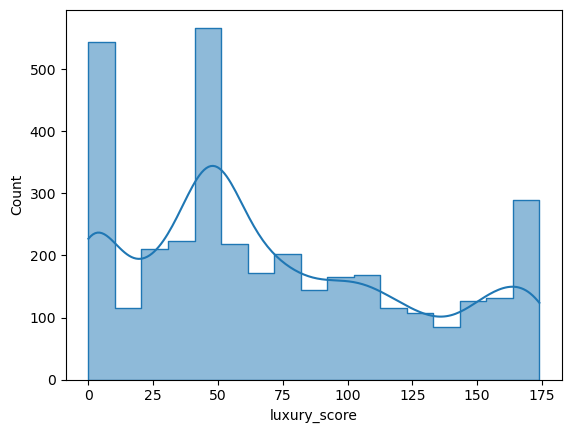

In [277]:
sns.histplot(df['luxury_score'], kde=True, element='step')

<Axes: xlabel='luxury_score'>

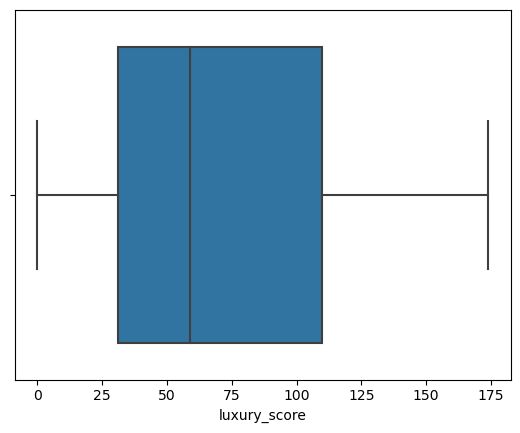

In [278]:
sns.boxplot(x=df['luxury_score'])

In [279]:
df.shape

(3588, 23)

In [280]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [281]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp pedestal,sector 70a,1.60,10159.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3.0,3.0,3,2.0,North-East,New Property,NaN,NaN,1575.0,0.0,1.0,0.0,0.0,1.0,2.0,77.0
1,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3.0,3.0,3+,2.0,North-East,Relatively New,NaN,NaN,1450.0,0.0,0.0,0.0,0.0,1.0,1.0,145.0
3,flat,signature global city,sector 37d,0.80,8421.0,950.0,Super Built up area 950(88.26 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,950.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,42.0
4,flat,dlf the ultima,sector 81,2.25,10699.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3.0,3.0,3+,11.0,North-East,Relatively New,2103.0,1600.0,1257.0,1.0,1.0,0.0,1.0,1.0,0.0,49.0
5,flat,dlf the ultima,sector 81,2.35,11175.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3.0,3.0,3+,14.0,South,Relatively New,2103.0,1550.0,1257.0,1.0,1.0,0.0,1.0,1.0,0.0,49.0


<Axes: xlabel='price_per_sqft', ylabel='Count'>

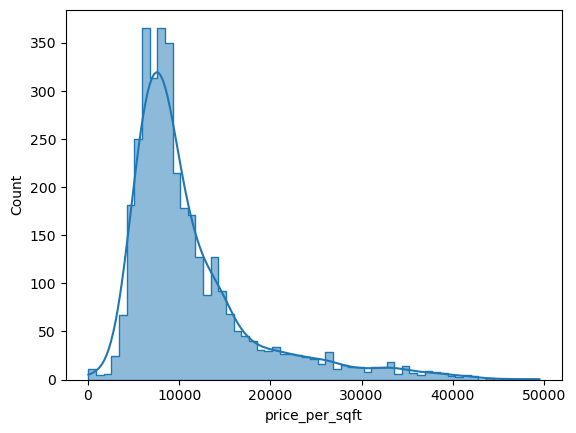

In [282]:
sns.histplot(df['price_per_sqft'], kde=True, element='step')

<Axes: xlabel='price_per_sqft'>

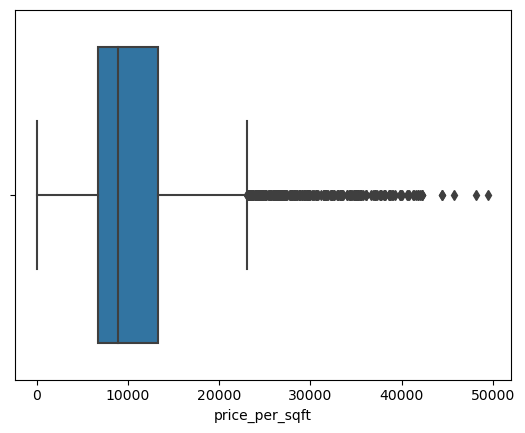

In [283]:
sns.boxplot(x=df['price_per_sqft'])

In [284]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
39,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,60.0
391,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,1.0,44.0
650,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,7.0
883,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,121.0
1211,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1854,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,97.0
1961,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2400,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,103.0
3179,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,1.0,88.0


In [285]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

185.9466666666667

In [286]:
df[(df['area']/df['bedRoom'])<185]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,rajendra park gurgaon,sector 105,0.37,10278.0,360.0,Plot area 360(33.45 sq.m.),4.0,3.0,2,3.0,East,Relatively New,NaN,360.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0
162,house,independent,sector 21,0.60,6173.0,972.0,Plot area 108(90.3 sq.m.),8.0,3.0,2,3.0,NaN,Old Property,NaN,972.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0
236,house,independent,sohna road road,1.20,22305.0,538.0,Plot area 50,4.0,4.0,3+,4.0,West,Old Property,NaN,535.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,8.0
237,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8.0,8.0,3+,4.0,East,Relatively New,NaN,162.0,160.0,0.0,0.0,1.0,1.0,0.0,1.0,94.0
247,house,independent,sector 105,0.60,11111.0,540.0,Plot area 60(50.17 sq.m.),8.0,4.0,3,3.0,West,New Property,NaN,540.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8.0,8.0,3,4.0,East,Moderately Old,NaN,62.0,60.0,0.0,0.0,0.0,0.0,1.0,1.0,40.0
3553,house,ss omnia,sector 86,0.42,9333.0,450.0,Plot area 50(4.65 sq.m.),5.0,3.0,2,3.0,NaN,Relatively New,NaN,50.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3604,house,independent,sector 13,0.90,11465.0,785.0,Plot area 785(72.93 sq.m.),5.0,4.0,3,3.0,North-West,Moderately Old,NaN,785.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0
3675,house,independent,sector 13,1.50,11538.0,1300.0,Plot area 1300(120.77 sq.m.),10.0,7.0,3,4.0,East,Moderately Old,NaN,1300.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [287]:
x = df[df['price_per_sqft'] < 20000] 
# to know how area is samll still no. of room is large

In [288]:
(x['area']/x['bedRoom']).quantile(0.05)

253.875

In [289]:
df[df['area']/df['bedRoom'] < 185].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
915,house,independent,sector 7,0.90,10000.0,900.0,Plot area 100(83.61 sq.m.),6.0,4.0,3,3.0,North-East,Old Property,NaN,900.0,NaN,0.0,1.0,0.0,0.0,1.0,1.0,44.0
611,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1894,house,independent,sector 12,1.00,8230.0,1215.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 ...,9.0,7.0,3+,3.0,North,Moderately Old,NaN,3750.0,NaN,0.0,0.0,1.0,1.0,0.0,2.0,7.0
2034,house,independent,sector 3,0.92,15257.0,603.0,Built Up area: 603 (56.02 sq.m.),4.0,1.0,0,1.0,NaN,Undefined,NaN,603.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0
595,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2.0,2.0,2,1.0,NaN,Undefined,NaN,NaN,33.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


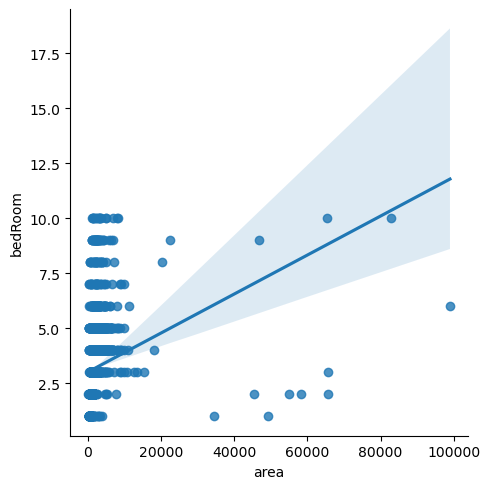

In [290]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [293]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [296]:
df[df['area_room_ratio'] < 250]['bedRoom'].value_counts()

2.0     47
3.0     32
5.0     28
4.0     17
6.0     17
9.0     15
8.0     12
7.0      8
10.0     7
Name: bedRoom, dtype: int64

In [298]:
df = df[df['area_room_ratio'] > 100]

In [300]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,bptp pedestal,sector 70a,1.60,10159.0,1575.0,Carpet area: 1575 (146.32 sq.m.),3.0,3.0,3,2.0,North-East,New Property,NaN,NaN,1575.0,0.0,1.0,0.0,0.0,1.0,2.0,77.0,525.000000
1,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3.0,3.0,3+,2.0,North-East,Relatively New,NaN,NaN,1450.0,0.0,0.0,0.0,0.0,1.0,1.0,145.0,483.333333
3,flat,signature global city,sector 37d,0.80,8421.0,950.0,Super Built up area 950(88.26 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,950.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,42.0,475.000000
4,flat,dlf the ultima,sector 81,2.25,10699.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3.0,3.0,3+,11.0,North-East,Relatively New,2103.0,1600.0,1257.0,1.0,1.0,0.0,1.0,1.0,0.0,49.0,701.000000
5,flat,dlf the ultima,sector 81,2.35,11175.0,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up...,3.0,3.0,3+,14.0,South,Relatively New,2103.0,1550.0,1257.0,1.0,1.0,0.0,1.0,1.0,0.0,49.0,701.000000


In [303]:
outlier_df = df[(df['area_room_ratio'] <250) & (df['bedRoom'] < 3)]

In [308]:
outlier_df['bedRoom'] = round(outlier_df['bedRoom'] / outlier_df['floorNum'])

C:\Users\Shivam\AppData\Local\Temp\ipykernel_4940\1158418728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['bedRoom'] = round(outlier_df['bedRoom'] / outlier_df['floorNum'])


In [309]:
df.update(outlier_df)

In [310]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [311]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
102,house,independent,sector 12,6.00,35088.0,1710.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9.0,6.0,2,2.0,North-East,Old Property,NaN,NaN,1600.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,190.000000
134,flat,mvn athens,sohna road,0.25,5187.0,482.0,Carpet area: 481.73 (44.75 sq.m.),inf,2.0,1,0.0,North,Relatively New,NaN,NaN,481.684525,0.0,0.0,0.0,1.0,0.0,2.0,90.0,0.000000
136,house,independent,sector 47,4.60,26620.0,1728.0,Plot area 192(160.54 sq.m.),7.0,6.0,3+,4.0,NaN,Moderately Old,NaN,1728.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,51.0,246.857143
161,house,independent,sector 11,2.10,17284.0,1215.0,Plot area 135(112.88 sq.m.),6.0,6.0,3+,3.0,NaN,Relatively New,NaN,1215.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,14.0,202.500000
162,house,independent,sector 21,0.60,6173.0,972.0,Plot area 108(90.3 sq.m.),8.0,3.0,2,3.0,NaN,Old Property,NaN,972.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,121.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,house,independent,sector 13,1.50,11538.0,1300.0,Plot area 1300(120.77 sq.m.),10.0,7.0,3,4.0,East,Moderately Old,NaN,1300.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,130.000000
3678,house,rattan garden,sector 7,1.30,13499.0,963.0,Built Up area: 963 (89.47 sq.m.),5.0,3.0,2,3.0,NaN,Old Property,NaN,963.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,192.600000
3706,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,120.000000
3757,house,unitech south city,sector 50,5.88,27222.0,2160.0,Plot area 240(200.67 sq.m.),9.0,9.0,3+,3.0,East,Relatively New,NaN,2160.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,128.0,240.000000


In [312]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(78, 24)

In [314]:
df.shape

(3568, 24)

In [ ]:
df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

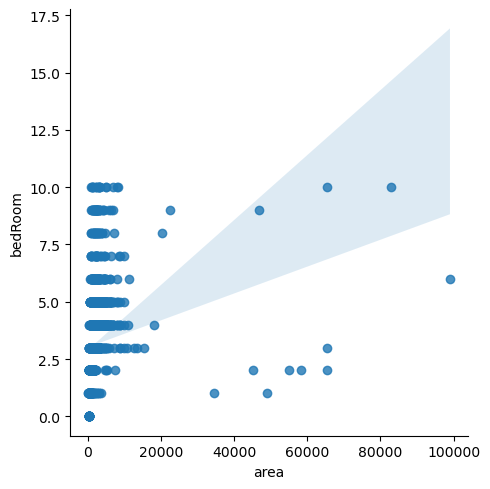

In [315]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [316]:
df.shape

(3568, 24)

In [317]:
df.to_csv('gurgaon_properties_outlier_treated.csv', index=False)